In [1810]:
# import libraries

In [1811]:
import pandas as pd
import numpy as np

In [1812]:
# read csv file

In [1813]:
df = pd.read_csv("manager_salary_survey.csv")

In [1814]:
# check the structure of the dataset

In [1815]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [1816]:
# check the rows

In [1817]:
df.count().max()

28087

In [1818]:
# check the column names

In [1819]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [1820]:
# Rename the column names

In [1821]:
df = df.rename(columns={"How old are you?":"Age", "What industry do you work in?":"Industry", "If your job title needs additional context, please clarify here:":"Job's additional context", "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Annual salary", "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.":"Monetary compensation", "Please indicate the currency":"Currency", "If \"Other,\" please indicate the currency here: ":"Other currency", "If your income needs additional context, please provide it here:":"Income additional context", "What country do you work in?":"Country", "If you're in the U.S., what state do you work in?":"State", "What city do you work in?":"City", "How many years of professional work experience do you have overall?":"Work experience", "How many years of professional work experience do you have in your field?":"Relative work experience", "What is your highest level of education completed?":"Education level", "What is your gender?":"Gender", "What is your race? (Choose all that apply.)":"Race"})

In [1822]:
# Check for missing values

In [1823]:
df.isnull().any()

Timestamp                    False
Age                          False
Industry                      True
Job title                     True
Job's additional context      True
Annual salary                False
Monetary compensation         True
Currency                     False
Other currency                True
Income additional context     True
Country                      False
State                         True
City                          True
Work experience              False
Relative work experience     False
Education level               True
Gender                        True
Race                          True
dtype: bool

In [1824]:
# Check the currency to fill the missing and inconsistency country values 

In [1825]:
df['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [1826]:
# Define the mapping of currency codes to countries

In [1827]:
currency_to_country = {'USD': 'United States', 'GBP': 'United Kingdom', 'CAD': 'Canada', 'EUR': 'European Union', 'AUD/NZD': 'Australia/New Zealand', 'Other': 'Other', 'CHF': 'Switzerland', 'ZAR': 'South Africa', 'SEK': 'Sweden', 'HKD': 'Hong Kong', 'JPY': 'Japan'}

In [1828]:
# Update the 'country' column based on the 'currency' column

In [1829]:
df['Country'] = df['Currency'].map(currency_to_country).fillna(df['Country'])

In [1830]:
# Check for missing values for Industry column

In [1831]:
df[df['Industry'].isna()==1]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
360,4/27/2021 11:08:41,45-54,NaN,Proposal Manager,NaN,"87,938",4000.0,USD,NaN,NaN,United States,North Carolina,Wilmington,21 - 30 years,11 - 20 years,College degree,Woman,White
645,4/27/2021 11:12:59,35-44,NaN,Legal editor,NaN,"82,000",8200.0,USD,NaN,NaN,United States,New York,Rochester,11 - 20 years,11 - 20 years,Master's degree,Woman,White
1604,4/27/2021 11:28:20,25-34,NaN,Commissioning Editor,NaN,"36,000",NaN,GBP,NaN,NaN,United Kingdom,NaN,London,11 - 20 years,8 - 10 years,Master's degree,Woman,"Asian or Asian American, White"
2055,4/27/2021 11:37:01,35-44,NaN,Research Manager,NaN,"115,000",NaN,USD,NaN,NaN,United States,District of Columbia,DC,21 - 30 years,11 - 20 years,Master's degree,Woman,White
2063,4/27/2021 11:37:12,35-44,NaN,office manager,manage a building vs managing employees,"40,000",NaN,USD,NaN,NaN,United States,Nevada,Las Vegas,11 - 20 years,11 - 20 years,High School,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27730,3/27/2022 10:59:33,18-24,NaN,chief executive official,NaN,50,NaN,ZAR,NaN,NaN,South Africa,NaN,castellon,8 - 10 years,11 - 20 years,NaN,NaN,NaN
27853,8/4/2022 18:33:50,18-24,NaN,Archivist,NaN,50000,NaN,USD,NaN,NaN,United States,Wisconsin,Madison,2 - 4 years,2 - 4 years,Master's degree,Man,White
27902,11/15/2022 18:24:41,35-44,NaN,Senior IT Consultant,NaN,120000000,NaN,Other,COP,NaN,Other,NaN,Bogota,11 - 20 years,8 - 10 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
28006,2/6/2024 9:07:45,under 18,NaN,vv,NaN,76,NaN,USD,NaN,NaN,United States,NaN,irving,1 year or less,1 year or less,NaN,NaN,NaN


In [1832]:
# Fill the missing values

In [1833]:
df['Industry'] = df['Industry'].fillna('Unknown')

In [1834]:
# Check for missing values for Job title column

In [1835]:
df[df['Job title'].isna()==1]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
27996,11/29/2023 19:59:34,18-24,I'm currently a student and don't have a job,NaN,I don't have one right now,0,0.0,USD,NaN,There is no income right now,United States,Pennsylvania,NaN,2 - 4 years,2 - 4 years,Some college,Man,Black or African American


In [1836]:
# Drop the record with the missing

In [1837]:
df.dropna(subset=['Job title'], inplace=True)

In [1838]:
# Check for missing values for Monetary compensation column

In [1839]:
df[df['Monetary compensation'].isna()==1]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,United States,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT","50,000",NaN,USD,NaN,NaN,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
14,4/27/2021 11:03:11,18-24,Health care,Patient care coordinator,NaN,"32,000",NaN,CAD,NaN,NaN,Canada,NaN,Remote,1 year or less,1 year or less,College degree,Woman,White
17,4/27/2021 11:03:19,45-54,Art & Design,graphic designer,NaN,"59,000",NaN,USD,NaN,NaN,United States,California,Pomona,21 - 30 years,21 - 30 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,9/19/2024 11:08:07,18-24,Engineering or Manufacturing,Operations Project Lead,NaN,41600,NaN,USD,NaN,NaN,United States,Georgia,Milledgeville,5-7 years,1 year or less,Some college,Man,"Hispanic, Latino, or Spanish origin"
28082,9/30/2024 10:52:30,55-64,Government and Public Administration,Clerical Officer,NaN,28600,NaN,EUR,NaN,NaN,European Union,NaN,Dublin,21 - 30 years,1 year or less,"Professional degree (MD, JD, etc.)",Man,White
28084,10/7/2024 5:17:56,65 or over,Social networks,Content creator,NaN,2000000,NaN,USD,NaN,NaN,United States,"Utah, Wisconsin",Milwaukee,41 years or more,2 - 4 years,PhD,Non-binary,"Asian or Asian American, Black or African Amer..."
28085,10/28/2024 17:33:38,35-44,Insurance,Claim Manager,NaN,109000,NaN,USD,NaN,NaN,United States,Georgia,Atlanta,21 - 30 years,21 - 30 years,High School,Woman,Black or African American


In [1840]:
# Fill the missing values

In [1841]:
df['Monetary compensation'] = df['Monetary compensation'].fillna(0)

In [1842]:
# Check for missing values for State column for the records that have 'Country'==United States

In [1843]:
df[(df['Country'] == 'United States')&(df['State'].isna())]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
10,4/27/2021 11:03:03,25-34,Nonprofits,Office Manager,NaN,"47,500",0.0,USD,NaN,NaN,United States,NaN,"Boston, MA",5-7 years,5-7 years,College degree,Woman,White
21,4/27/2021 11:03:24,35-44,Nonprofits,Program Coordinator & Assistant Editor,NaN,"50,000",0.0,USD,NaN,NaN,United States,NaN,Atlanta,5-7 years,2 - 4 years,PhD,Woman,White
71,4/27/2021 11:04:39,35-44,Aerospace contracting,Project engineer,Cost/schedule analyst,"122,000",3600.0,USD,NaN,NaN,United States,NaN,Colorado Springs,11 - 20 years,11 - 20 years,Master's degree,Woman,White
132,4/27/2021 11:05:46,35-44,Computing or Tech,Product Manager,NaN,"130,000",0.0,USD,NaN,NaN,United States,NaN,Philadelphia,11 - 20 years,11 - 20 years,College degree,Man,White
133,4/27/2021 11:05:46,55-64,Education (Higher Education),career services professional,NaN,"55,000",0.0,USD,NaN,NaN,United States,NaN,Indianapolis,21 - 30 years,21 - 30 years,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28035,4/23/2024 23:39:34,18-24,Education (Higher Education),Teacher,NaN,13860,0.0,USD,NaN,NaN,United States,NaN,Stgo,1 year or less,1 year or less,NaN,NaN,NaN
28036,4/25/2024 9:22:30,35-44,"Accounting, Banking & Finance",DBA,LORD,1000,100.0,USD,NaN,100,United States,NaN,LOUTRECITY,41 years or more,41 years or more,Some college,Other or prefer not to answer,Another option not listed here or prefer not t...
28048,6/24/2024 14:53:58,25-34,Engineering or Manufacturing,Senior developer,NaN,80000,10000.0,USD,NaN,NaN,United States,NaN,Bucharest,11 - 20 years,8 - 10 years,Master's degree,Man,White
28060,7/26/2024 11:20:45,18-24,Computing or Tech,IT,NaN,1700,10.0,USD,NaN,NaN,United States,NaN,Yangon,2 - 4 years,1 year or less,Some college,Man,Asian or Asian American


In [1844]:
# Fill the missing values for State column for the records that have 'Country'==United States

In [1845]:
df.loc[(df['Country'] == 'United States') & (df['State'].isna()), 'State'] = 'Not Specified'

In [1846]:
# Check for missing values for State column for the rest of the records

In [1847]:
df[df['State'].isna()==1]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
14,4/27/2021 11:03:11,18-24,Health care,Patient care coordinator,NaN,"32,000",0.0,CAD,NaN,NaN,Canada,NaN,Remote,1 year or less,1 year or less,College degree,Woman,White
15,4/27/2021 11:03:11,35-44,Utilities & Telecommunications,Quality And Compliance Specialist,NaN,"24,000",500.0,GBP,NaN,NaN,United Kingdom,NaN,Lincoln,11 - 20 years,5-7 years,College degree,Man,White
22,4/27/2021 11:03:27,35-44,Nonprofits,Event Planner,NaN,"63,000",0.0,CAD,NaN,NaN,Canada,NaN,Toronto,11 - 20 years,8 - 10 years,Master's degree,Woman,White
41,4/27/2021 11:04:01,35-44,"Marketing, Advertising & PR",Senior Copywriter,NaN,"35,000",6000.0,GBP,NaN,NaN,United Kingdom,NaN,Liverpool,11 - 20 years,11 - 20 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28055,7/12/2024 18:25:27,18-24,"Accounting, Banking & Finance",Investment Banking Analyst,NaN,6000070000,0.0,CAD,NaN,NaN,Canada,NaN,Toronto,2 - 4 years,1 year or less,College degree,Woman,Black or African American
28056,7/12/2024 18:25:42,35-44,Retail,Cashier Assistant,NaN,18300,0.0,CAD,NaN,NaN,Canada,NaN,Kitchener,8 - 10 years,8 - 10 years,Master's degree,Man,"Hispanic, Latino, or Spanish origin"
28061,8/20/2024 1:06:13,25-34,Health care,Clinical physiologist,NaN,1200000,0.0,Other,NGN,NaN,Other,NaN,Lagos,2 - 4 years,2 - 4 years,College degree,Woman,Black or African American
28077,9/19/2024 19:16:28,25-34,Social Work,Counsellor,NaN,40000,0.0,Other,SGD,NaN,Other,NaN,Singapore,8 - 10 years,8 - 10 years,Master's degree,Woman,Asian or Asian American


In [1848]:
# Fill the missing values

In [1849]:
df['State'] = df['State'].fillna('Not U.S.')

In [1850]:
# Check for missing values for City column

In [1851]:
df[df['City'].isna()==1]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
148,4/27/2021 11:05:54,25-34,Education (Higher Education),English as a Second Language Teacher,NaN,"18,000",0.0,EUR,NaN,NaN,European Union,Not U.S.,NaN,8 - 10 years,5-7 years,College degree,Woman,White
700,4/27/2021 11:13:46,25-34,Libraries,Supervisor of Children's Services,NaN,"60,800",0.0,USD,NaN,NaN,United States,Connecticut,NaN,8 - 10 years,5-7 years,Master's degree,Woman,White
904,4/27/2021 11:16:49,45-54,Computing or Tech,senior primary systems engineer,NaN,"117,000",6.0,USD,NaN,NaN,United States,California,NaN,31 - 40 years,11 - 20 years,College degree,Woman,Black or African American
944,4/27/2021 11:17:32,35-44,Government and Public Administration,Disability support,NaN,"57,500",0.0,CAD,NaN,NaN,Canada,Not U.S.,NaN,5-7 years,2 - 4 years,College degree,Woman,White
1396,4/27/2021 11:24:58,35-44,Government and Public Administration,Health science administrator,NaN,"116,000",0.0,USD,NaN,NaN,United States,Maryland,NaN,11 - 20 years,2 - 4 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,10/26/2021 11:20:28,25-34,Computing or Tech,Senior data scientist,NaN,140000,12000.0,USD,NaN,NaN,United States,Florida,NaN,5-7 years,2 - 4 years,Master's degree,Man,White
27019,10/26/2021 11:46:14,25-34,Education (Primary/Secondary),System Administrator,NaN,45000,0.0,USD,NaN,NaN,United States,Texas,NaN,2 - 4 years,5-7 years,College degree,Man,White
27248,10/26/2021 13:43:53,18-24,Science,Laboratory technician,NaN,22000,0.0,GBP,NaN,NaN,United Kingdom,Not U.S.,NaN,2 - 4 years,1 year or less,Master's degree,Woman,White
27972,8/21/2023 22:47:22,under 18,"Accounting, Banking & Finance",McDonalds Crew Member,NaN,40000,0.0,USD,NaN,NaN,United States,Minnesota,NaN,1 year or less,1 year or less,High School,Woman,Asian or Asian American


In [1852]:
# Fill the missing values

In [1853]:
df['City'] = df['City'].fillna('Not Specified')

In [1854]:
# Check for missing values for Education level column

In [1855]:
df[df['Education level'].isna()==1]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
13,4/27/2021 11:03:10,25-34,Law,Legal Aid Staff Attorney,non-profit law firm,"52,000",0.0,USD,NaN,NaN,United States,Minnesota,Saint Paul,2 - 4 years,2 - 4 years,NaN,Woman,White
24,4/27/2021 11:03:31,25-34,Public Library,Teen Librarian,NaN,"44,500",0.0,USD,NaN,NaN,United States,Florida,Bradenton,5-7 years,2 - 4 years,NaN,Woman,White
192,4/27/2021 11:06:27,35-44,Education (Higher Education),Associate Director,Research,"63,000",2000.0,USD,NaN,Longevity pay,United States,Texas,El Paso,11 - 20 years,8 - 10 years,NaN,Woman,"Hispanic, Latino, or Spanish origin"
241,4/27/2021 11:07:12,35-44,Sales,Sales support,NaN,"23,050",0.0,GBP,NaN,NaN,United Kingdom,Not U.S.,London,11 - 20 years,8 - 10 years,NaN,Woman,White
659,4/27/2021 11:13:14,45-54,Utilities & Telecommunications,Financial Analyst,I manage the forecast/budget process for cell ...,"87,360",0.0,USD,NaN,NaN,United States,Texas,Houston,21 - 30 years,11 - 20 years,NaN,Woman,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28015,2/22/2024 7:27:47,18-24,Computing or Tech,Intern,nhi,0,0.0,GBP,hhv,hvhv,United Kingdom,Not U.S.,pubw,1 year or less,1 year or less,NaN,Woman,Black or African American
28035,4/23/2024 23:39:34,18-24,Education (Higher Education),Teacher,NaN,13860,0.0,USD,NaN,NaN,United States,Not Specified,Stgo,1 year or less,1 year or less,NaN,NaN,NaN
28043,5/27/2024 2:47:26,25-34,Computing or Tech,Lead,NaN,2600000,0.0,USD,NaN,NaN,United States,Florida,Newyork,8 - 10 years,2 - 4 years,NaN,Man,NaN
28049,6/28/2024 14:00:00,25-34,Education (Higher Education),fasd,asdsda,5,0.0,EUR,ff,ff,European Union,"Colorado, Delaware, New Jersey, West Virginia,...",ff,21 - 30 years,5-7 years,NaN,NaN,NaN


In [1856]:
# Fill the missing values

In [1857]:
df['Education level'] = df['Education level'].fillna('Unknown')

In [1858]:
# Check for missing values for Gender column

In [1859]:
df[df['Gender'].isna()==1]

,Timestamp,Age,Industry,Job title,Job's additional context,Annual salary,Monetary compensation,Currency,Other currency,Income additional context,Country,State,City,Work experience,Relative work experience,Education level,Gender,Race
171,4/27/2021 11:06:12,25-34,Government and Public Administration,Program Analyst,Specializing in training & communications,"117,500",1500.0,USD,NaN,NaN,United States,Not Specified,Washington DC,8 - 10 years,5-7 years,Master's degree,NaN,"Hispanic, Latino, or Spanish origin"
490,4/27/2021 11:10:43,25-34,Hospitality & Events,Senior Manager,NaN,"75,000",25000.0,USD,NaN,NaN,United States,California,Los Angeles,5-7 years,5-7 years,College degree,NaN,White
537,4/27/2021 11:11:24,25-34,Education (Higher Education),Online Instructor,This type of job would never be given 40 hours...,"70,000",0.0,CAD,NaN,NaN,Canada,Not U.S.,"Waterloo, ON",5-7 years,5-7 years,Master's degree,NaN,White
647,4/27/2021 11:13:01,35-44,Media & Digital,Assistant Editor,NaN,"40,000",0.0,USD,NaN,NaN,United States,New Jersey,Philly 'burbs,11 - 20 years,11 - 20 years,College degree,NaN,White
658,4/27/2021 11:13:14,25-34,Nonprofits,Prospect Research Coordinator,NaN,"65,000",0.0,USD,NaN,NaN,United States,New Jersey,Newark,8 - 10 years,8 - 10 years,Master's degree,NaN,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27942,3/1/2023 9:43:37,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,Unknown,NaN,NaN
28002,1/12/2024 19:50:31,35-44,Engineering or Manufacturing,Quality Engineer,NaN,105000,0.0,USD,NaN,NaN,United States,Georgia,Atlanta,11 - 20 years,8 - 10 years,Master's degree,NaN,Another option not listed here or prefer not t...
28006,2/6/2024 9:07:45,under 18,Unknown,vv,NaN,76,0.0,USD,NaN,NaN,United States,Not Specified,irving,1 year or less,1 year or less,Unknown,NaN,NaN
28035,4/23/2024 23:39:34,18-24,Education (Higher Education),Teacher,NaN,13860,0.0,USD,NaN,NaN,United States,Not Specified,Stgo,1 year or less,1 year or less,Unknown,NaN,NaN


In [1860]:
# Fill the missing values

In [1861]:
df['Gender'] = df['Gender'].fillna('Unknown')

In [1862]:
# Drop specific columns by name

In [1863]:
df.drop(['Job\'s additional context', 'Other currency', 'Income additional context', 'Race'], axis=1, inplace=True)

In [1864]:
df.head()

,Timestamp,Age,Industry,Job title,Annual salary,Monetary compensation,Currency,Country,State,City,Work experience,Relative work experience,Education level,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,Not U.S.,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",0.0,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman


In [1865]:
df.isnull().any()

Timestamp                   False
Age                         False
Industry                    False
Job title                   False
Annual salary               False
Monetary compensation       False
Currency                    False
Country                     False
State                       False
City                        False
Work experience             False
Relative work experience    False
Education level             False
Gender                      False
dtype: bool

In [1866]:
df.count().max()

28086

In [1867]:
# Check for duplicates

In [1868]:
df[df.duplicated()]

,Timestamp,Age,Industry,Job title,Annual salary,Monetary compensation,Currency,Country,State,City,Work experience,Relative work experience,Education level,Gender


In [1869]:
# Check the structure of data and datatypes 

In [1870]:
df.dtypes

Timestamp                    object
Age                          object
Industry                     object
Job title                    object
Annual salary                object
Monetary compensation       float64
Currency                     object
Country                      object
State                        object
City                         object
Work experience              object
Relative work experience     object
Education level              object
Gender                       object
dtype: object

In [1871]:
# Convert the Timestamp column to datetime type

In [1872]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

In [1873]:
df['Timestamp']

0       2021-04-27 11:02:10
1       2021-04-27 11:02:22
2       2021-04-27 11:02:38
3       2021-04-27 11:02:41
4       2021-04-27 11:02:42
                ...        
28082   2024-09-30 10:52:30
28083   2024-10-04 13:05:24
28084   2024-10-07 05:17:56
28085   2024-10-28 17:33:38
28086   2024-10-30 13:44:49
Name: Timestamp, Length: 28086, dtype: datetime64[ns]

In [1874]:
df.head()

,Timestamp,Age,Industry,Job title,Annual salary,Monetary compensation,Currency,Country,State,City,Work experience,Relative work experience,Education level,Gender
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,Not U.S.,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",0.0,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman


In [1875]:
# Convert the rest of the columns to correct datatypes and remove unnecessary characters

In [1876]:
df['Age'] = df['Age'].astype('string')

In [1877]:
df['Industry'] = df['Industry'].astype('string')

In [1878]:
df['Job title'] = df['Job title'].astype('string')

In [1879]:
df['Annual salary'] = df['Annual salary'].str.replace(',', '')

In [1880]:
df['Annual salary'] = df['Annual salary'].astype('float')

In [1881]:
df['Currency'] = df['Currency'].astype('string')

In [1882]:
df['Country'] = df['Country'].astype('string')

In [1883]:
df['Country'].unique()

<StringArray>
[        'United States',        'United Kingdom',                'Canada',
        'European Union', 'Australia/New Zealand',                 'Other',
           'Switzerland',          'South Africa',                'Sweden',
             'Hong Kong',                 'Japan']
Length: 11, dtype: string

In [1884]:
df['State'] = df['State'].astype('string')

In [1885]:
df['City'] = df['City'].astype('string')

In [1886]:
df['Work experience'].unique()

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [1887]:
df['Work experience'] = df['Work experience'].astype('string')

In [1888]:
df['Relative work experience'].unique()

array(['5-7 years', '2 - 4 years', '21 - 30 years', '11 - 20 years',
       '1 year or less', '8 - 10 years', '31 - 40 years',
       '41 years or more'], dtype=object)

In [1889]:
df['Relative work experience'] = df['Relative work experience'].astype('string')

In [1890]:
df['Education level'].unique()

array(["Master's degree", 'College degree', 'PhD', 'Unknown',
       'Some college', 'High School',
       'Professional degree (MD, JD, etc.)'], dtype=object)

In [1891]:
df['Education level'] = df['Education level'].astype('string')

In [1892]:
df['Gender'].unique()

array(['Woman', 'Non-binary', 'Man', 'Unknown',
       'Other or prefer not to answer', 'Prefer not to answer'],
      dtype=object)

In [1893]:
df['Gender'] = df['Gender'].astype('string')

In [1894]:
df['Gender'].value_counts()

Woman                            21377
Man                               5492
Non-binary                         747
Other or prefer not to answer      298
Unknown                            171
Prefer not to answer                 1
Name: Gender, dtype: Int64

In [1895]:
# Convert the columns' letter to lowercase and replace the whitespaces with underscores

In [1896]:
df.columns = df.columns.str.lower()

In [1897]:
df.columns = df.columns.str.replace(' ', '_')

In [1898]:
df.head()

,timestamp,age,industry,job_title,annual_salary,monetary_compensation,currency,country,state,city,work_experience,relative_work_experience,education_level,gender
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,Not U.S.,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman


In [1899]:
df.columns

Index(['timestamp', 'age', 'industry', 'job_title', 'annual_salary',
       'monetary_compensation', 'currency', 'country', 'state', 'city',
       'work_experience', 'relative_work_experience', 'education_level',
       'gender'],
      dtype='object')

In [1900]:
# Create two new columns total_compensation and seniority_level

In [1901]:
# total_compensation 

In [1902]:
df['total_compensation'] = df['annual_salary'] + df['monetary_compensation']

In [1903]:
# relative_work_experience

In [1904]:
df['relative_work_experience'] = df['relative_work_experience'].astype(str)

In [1905]:
df['relative_work_experience'].unique()

array(['5-7 years', '2 - 4 years', '21 - 30 years', '11 - 20 years',
       '1 year or less', '8 - 10 years', '31 - 40 years',
       '41 years or more'], dtype=object)

In [1906]:
conditions = [
    (df['relative_work_experience'] == '1 year or less'),
    (df['relative_work_experience'] == '2 - 4 years'),
    (df['relative_work_experience'].isin(['5-7 years', '8 - 10 years'])),
    (df['relative_work_experience'].isin(['11 - 20 years', '21 - 30 years']))
]

In [1907]:
choices = ['Entry Level', 'Junior', 'Mid', 'Senior']

In [1908]:
df['seniority_level'] = np.select(conditions, choices, default='Executive')

In [1909]:
df['seniority_level'] = df['seniority_level'].astype('string')

In [1910]:
df['seniority_level'].value_counts()

Mid            11503
Senior          8409
Junior          6252
Entry Level     1497
Executive        425
Name: seniority_level, dtype: Int64

In [1911]:
# Loading into SQLite

In [1912]:
import sqlite3

In [1913]:
conn = sqlite3.connect('manager_salary_db.db')

In [1914]:
df.to_sql('manager_salary_data', conn, if_exists='replace', index=False)

In [1915]:
pd.read_sql_query("SELECT * FROM manager_salary_data LIMIT 5;", conn)

,timestamp,age,industry,job_title,annual_salary,monetary_compensation,currency,country,state,city,work_experience,relative_work_experience,education_level,gender,total_compensation,seniority_level
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,55000.0,Mid
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,Not U.S.,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,58600.0,Mid
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,34000.0,Junior
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,65000.0,Mid
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,67000.0,Mid


In [1916]:
# Data Analysis and Visualization

In [1917]:
# Bar Charts

In [1918]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1919]:
df['country'].unique()

<StringArray>
[        'United States',        'United Kingdom',                'Canada',
        'European Union', 'Australia/New Zealand',                 'Other',
           'Switzerland',          'South Africa',                'Sweden',
             'Hong Kong',                 'Japan']
Length: 11, dtype: string

In [1920]:
df_usa = df[df['country'] == 'United States']

In [1921]:
plt.figure(figsize=(30, 6))


<Figure size 2160x432 with 0 Axes>

<Figure size 2160x432 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, "Master's degree"),
  Text(1, 0, 'College degree'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Some college'),
  Text(5, 0, 'High School'),
  Text(6, 0, 'Professional degree (MD, JD, etc.)')])

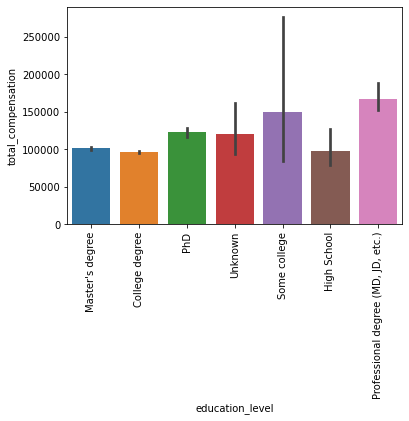

In [1922]:
bp = sns.barplot(data=df_usa, x='education_level', y='total_compensation')
plt.xticks(rotation=90)

In [1923]:
# Histograms

In [1924]:
df_eu = df[df['country'] == 'European Union']

<AxesSubplot:xlabel='age', ylabel='Count'>

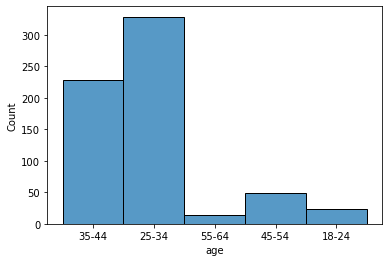

In [1925]:
sns.histplot(data=df_eu, x='age')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

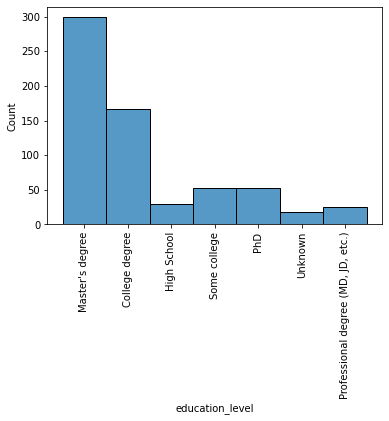

In [1926]:
sns.histplot(data=df_eu, x='education_level')
plt.xticks(rotation=90)

In [1927]:
# Box Plots for salary distributions by job title or seniority.

In [1928]:
df_usa['total_compensation']

0          55000.0
2          34000.0
3          65000.0
4          67000.0
5          62000.0
           ...    
28081      70000.0
28083      56160.0
28084    2000000.0
28085     109000.0
28086       8000.0
Name: total_compensation, Length: 23396, dtype: float64

<AxesSubplot:xlabel='total_compensation', ylabel='work_experience'>

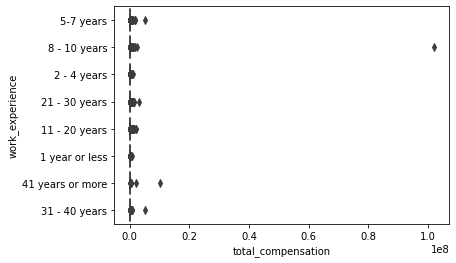

In [1929]:
sns.boxplot(x=df_usa['total_compensation'], y=df['work_experience'])

In [1931]:
df['total_compensation'].max()

6000070000.0

In [1932]:
df = df[df['annual_salary'] <= 1500000]

In [1939]:
df['total_compensation'].max()

1950000.0

In [1935]:
df_usa = df[df['country'] == 'United States']

In [1936]:
df_usa['total_compensation'].max()

1950000.0

<AxesSubplot:xlabel='annual_salary', ylabel='work_experience'>

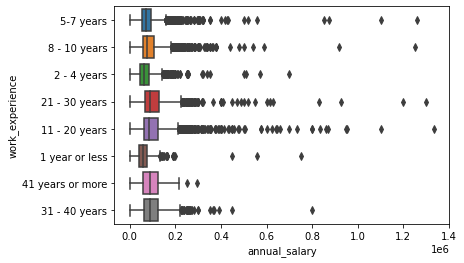

In [1940]:
sns.boxplot(x=df_usa['annual_salary'], y=df['work_experience'])

In [1503]:
# Summary statistics (e.g., average salary by job title or experience).

In [1942]:
df_annual_summary = df.groupby(['country', 'education_level'])['annual_salary'].agg(['mean', 'median']).reset_index()

In [1948]:
df_annual_summary[df_annual_summary['country']=='United States']

,country,education_level,mean,median
59,United States,College degree,86756.829270,75000.0
60,United States,High School,73350.099274,56000.0
61,United States,Master's degree,91864.603718,80000.0
62,United States,PhD,110721.195940,97000.0
63,United States,"Professional degree (MD, JD, etc.)",140538.592267,120000.0
64,United States,Some college,77623.234441,62500.0
65,United States,Unknown,94207.149351,75000.0


In [1949]:
df_annual_summary[df_annual_summary['country']=='European Union']

,country,education_level,mean,median
14,European Union,College degree,64768.065868,55000.0
15,European Union,High School,82976.666667,68500.0
16,European Union,Master's degree,58595.264214,51420.0
17,European Union,PhD,64018.584906,65000.0
18,European Union,"Professional degree (MD, JD, etc.)",63949.760000,56721.0
19,European Union,Some college,52297.269231,45000.0
20,European Union,Unknown,54988.500000,60500.0


In [1950]:
df_annual_summary.to_sql('annual_summary_data', conn, if_exists='replace', index=False)

In [ ]:
# Key insights based on age groups, industries, or geographic regions.

In [1186]:
# Save the final datasets in a new file

In [1951]:
df.to_csv('manager_salary.csv')

In [1952]:
df_annual_summary.to_csv('annual_summary.csv')